In [5]:
# Predicting Output Corresponding to Stage 1

In [6]:
# Since the machines in stage 1 operate in parallel each machine is considered as a seperate time step

In [71]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split, KFold # Stratified train, test split and cross validation
import os # To set path
from sklearn.preprocessing import StandardScaler  # Normalization techniques
from sklearn.metrics import mean_squared_error,r2_score # Accuracy metrics
from joblib import dump, load  # Loading and dumping model files
import matplotlib.backends.backend_pdf  # Adding plots to pdf
import matplotlib.pyplot as plt # Creating Plot
import seaborn as sns # Creating Plot
import math # For Calculating rmse
import warnings # For ignoring warnings from pandas
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.optimizers import SGD
from keras.models import model_from_yaml
import itertools

In [72]:
df = pd.read_csv("continuous_factory_process.csv")

output_col = df.filter(regex = 'Stage1.Output').columns.copy()
setpoint_col = df.filter(regex = 'Setpoint').columns.copy()

output_col= sorted(set(output_col) - set(setpoint_col))

### Generate a variable called Setting based on RawMaterial Properties to stratify train test split

In [73]:
raw_material_properties = list(df.filter(regex = 'RawMaterial.Property').columns.copy())
unique_comb_parameters = df.groupby(raw_material_properties).size().reset_index().rename(columns={0:'count'})
unique_comb_parameters.index.name = 'Setting'
unique_comb_parameters.drop('count', axis=1, inplace=True)
unique_comb_parameters = unique_comb_parameters.reset_index()
unique_comb_parameters['Setting'] = 'S'+ unique_comb_parameters['Setting'].astype(str)
#df.groupby(raw_material_properties)

# Merge the setting variable with the dataframe and identify the input columns for training

In [74]:
df = pd.merge(df, unique_comb_parameters, on = raw_material_properties, how = 'left')
input_col = df.columns.drop(df.filter(regex='Output|Setpoint|Combiner|Machine4|Machine5').columns).copy()
input_col = list(input_col)

In [75]:
cross_val_scores = pd.DataFrame(columns = ['CHARACTERISTIC_NAME', 'R2_score_Train', 'MAE_Train', 
                                           'R2_score_Test', 'MAE_Test'])
selected_features = pd.DataFrame(columns = ['CHARACTERISTIC_NAME', 'INPUT_FEATURES'])


# Define the directory location here ex: C:/Test/Feature_Imp_Plot.pdf
line_plot = matplotlib.backends.backend_pdf.PdfPages("Line_Plot_v2.pdf")

In [76]:

print ("Hello")
print("--- %s seconds ---" % (time.time() - start_time))

Hello
--- 5178.529015541077 seconds ---


Started
# Number of Records 13943
# of Records =  13941
Train on 10455 samples, validate on 3486 samples
Epoch 1/200
 - 4s - loss: 38.5416 - val_loss: 0.0276
Epoch 2/200
 - 4s - loss: 0.0440 - val_loss: 0.0145
Epoch 3/200
 - 4s - loss: 0.0329 - val_loss: 0.0116
Epoch 4/200
 - 4s - loss: 0.0268 - val_loss: 0.0100
Epoch 5/200
 - 4s - loss: 0.0231 - val_loss: 0.0097
Epoch 6/200
 - 4s - loss: 0.0204 - val_loss: 0.0101
Epoch 7/200
 - 4s - loss: 0.0186 - val_loss: 0.0105
Epoch 8/200
 - 4s - loss: 0.0162 - val_loss: 0.0076
Epoch 9/200
 - 4s - loss: 0.0144 - val_loss: 0.0076
Epoch 10/200
 - 4s - loss: 0.0132 - val_loss: 0.0086
Epoch 11/200
 - 4s - loss: 0.0126 - val_loss: 0.0073
Epoch 12/200
 - 4s - loss: 0.0113 - val_loss: 0.0072
Epoch 13/200
 - 4s - loss: 0.0110 - val_loss: 0.0083
Epoch 14/200
 - 4s - loss: 0.0110 - val_loss: 0.0072
Epoch 15/200
 - 4s - loss: 0.0108 - val_loss: 0.0070
Epoch 16/200
 - 4s - loss: 0.0103 - val_loss: 0.0070
Epoch 17/200
 - 4s - loss: 0.0103 - val_loss: 0.0067
Ep

Epoch 153/200
 - 4s - loss: 0.0032 - val_loss: 0.0029
Epoch 154/200
 - 4s - loss: 0.0039 - val_loss: 0.0027
Epoch 155/200
 - 4s - loss: 0.0034 - val_loss: 0.0025
Epoch 156/200
 - 4s - loss: 0.0034 - val_loss: 0.0025
Epoch 157/200
 - 4s - loss: 0.0034 - val_loss: 0.0029
Epoch 158/200
 - 4s - loss: 0.0033 - val_loss: 0.0029
Epoch 159/200
 - 4s - loss: 0.0032 - val_loss: 0.0027
Epoch 160/200
 - 4s - loss: 0.0032 - val_loss: 0.0025
Epoch 161/200
 - 4s - loss: 0.0031 - val_loss: 0.0023
Epoch 162/200
 - 4s - loss: 0.0032 - val_loss: 0.0031
Epoch 163/200
 - 4s - loss: 0.0032 - val_loss: 0.0024
Epoch 164/200
 - 4s - loss: 0.0032 - val_loss: 0.0024
Epoch 165/200
 - 4s - loss: 0.0031 - val_loss: 0.0025
Epoch 166/200
 - 4s - loss: 0.0035 - val_loss: 0.0022
Epoch 167/200
 - 4s - loss: 0.0035 - val_loss: 0.0024
Epoch 168/200
 - 4s - loss: 0.0032 - val_loss: 0.0022
Epoch 169/200
 - 4s - loss: 0.0032 - val_loss: 0.0024
Epoch 170/200
 - 4s - loss: 0.0031 - val_loss: 0.0026
Epoch 171/200
 - 4s - loss: 

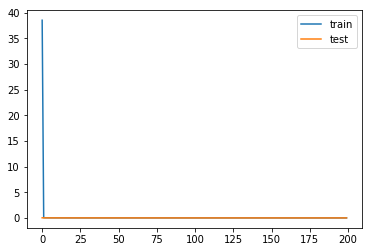

Testing R2 =  0.7301018651992249 Testing MAE =  0.003695496018273796
Training R2 =  0.7177114886912866 Training MAE =  0.003918637997110084
Started
# Number of Records 8136
# of Records =  8126
Train on 6094 samples, validate on 2032 samples
Epoch 1/200
 - 3s - loss: 53.3499 - val_loss: 1.5403
Epoch 2/200
 - 2s - loss: 1.3289 - val_loss: 0.7576
Epoch 3/200
 - 2s - loss: 0.9116 - val_loss: 0.6869
Epoch 4/200
 - 2s - loss: 0.7878 - val_loss: 0.5965
Epoch 5/200
 - 2s - loss: 0.7208 - val_loss: 0.5931
Epoch 6/200
 - 2s - loss: 0.6697 - val_loss: 0.5420
Epoch 7/200
 - 2s - loss: 0.6211 - val_loss: 0.5333
Epoch 8/200
 - 2s - loss: 0.5955 - val_loss: 0.4898
Epoch 9/200
 - 2s - loss: 0.5663 - val_loss: 0.4706
Epoch 10/200
 - 2s - loss: 0.5330 - val_loss: 0.4240
Epoch 11/200
 - 2s - loss: 0.4980 - val_loss: 0.3823
Epoch 12/200
 - 2s - loss: 0.4529 - val_loss: 0.3642
Epoch 13/200
 - 2s - loss: 0.3959 - val_loss: 0.2900
Epoch 14/200
 - 2s - loss: 0.3574 - val_loss: 0.2551
Epoch 15/200
 - 2s - los

 - 2s - loss: 0.1128 - val_loss: 0.0942
Epoch 151/200
 - 2s - loss: 0.1037 - val_loss: 0.1073
Epoch 152/200
 - 2s - loss: 0.1051 - val_loss: 0.0958
Epoch 153/200
 - 2s - loss: 0.1054 - val_loss: 0.0919
Epoch 154/200
 - 2s - loss: 0.0992 - val_loss: 0.0957
Epoch 155/200
 - 2s - loss: 0.0997 - val_loss: 0.0742
Epoch 156/200
 - 2s - loss: 0.1131 - val_loss: 0.0926
Epoch 157/200
 - 2s - loss: 0.1068 - val_loss: 0.0948
Epoch 158/200
 - 2s - loss: 0.1097 - val_loss: 0.0779
Epoch 159/200
 - 2s - loss: 0.1094 - val_loss: 0.0987
Epoch 160/200
 - 2s - loss: 0.1043 - val_loss: 0.0935
Epoch 161/200
 - 2s - loss: 0.1064 - val_loss: 0.0749
Epoch 162/200
 - 2s - loss: 0.1099 - val_loss: 0.0808
Epoch 163/200
 - 2s - loss: 0.1114 - val_loss: 0.0864
Epoch 164/200
 - 2s - loss: 0.1123 - val_loss: 0.0952
Epoch 165/200
 - 2s - loss: 0.1096 - val_loss: 0.0847
Epoch 166/200
 - 2s - loss: 0.1038 - val_loss: 0.0926
Epoch 167/200
 - 2s - loss: 0.1052 - val_loss: 0.0941
Epoch 168/200
 - 2s - loss: 0.1028 - val_l

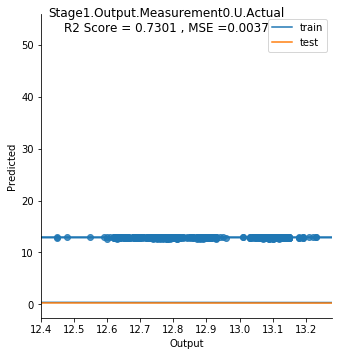

Testing R2 =  0.9299285209759748 Testing MAE =  0.08515222431402143
Training R2 =  0.9269079024176207 Training MAE =  0.10074375508148811
Started
# Number of Records 13718
# of Records =  13717
Train on 10287 samples, validate on 3430 samples
Epoch 1/200
 - 6s - loss: 5.9517 - val_loss: 0.0098
Epoch 2/200
 - 6s - loss: 0.0195 - val_loss: 0.0110
Epoch 3/200
 - 6s - loss: 0.0145 - val_loss: 0.0072
Epoch 4/200
 - 6s - loss: 0.0121 - val_loss: 0.0073
Epoch 5/200
 - 5s - loss: 0.0110 - val_loss: 0.0083
Epoch 6/200
 - 5s - loss: 0.0094 - val_loss: 0.0096
Epoch 7/200
 - 5s - loss: 0.0086 - val_loss: 0.0067
Epoch 8/200
 - 5s - loss: 0.0083 - val_loss: 0.0062
Epoch 9/200
 - 5s - loss: 0.0078 - val_loss: 0.0058
Epoch 10/200
 - 5s - loss: 0.0079 - val_loss: 0.0067
Epoch 11/200
 - 5s - loss: 0.0075 - val_loss: 0.0068
Epoch 12/200
 - 5s - loss: 0.0074 - val_loss: 0.0068
Epoch 13/200
 - 6s - loss: 0.0070 - val_loss: 0.0076
Epoch 14/200
 - 5s - loss: 0.0071 - val_loss: 0.0057
Epoch 15/200
 - 5s - los

 - 5s - loss: 0.0037 - val_loss: 0.0036
Epoch 151/200
 - 5s - loss: 0.0037 - val_loss: 0.0035
Epoch 152/200
 - 5s - loss: 0.0036 - val_loss: 0.0034
Epoch 153/200
 - 5s - loss: 0.0036 - val_loss: 0.0034
Epoch 154/200
 - 6s - loss: 0.0036 - val_loss: 0.0034
Epoch 155/200
 - 5s - loss: 0.0036 - val_loss: 0.0033
Epoch 156/200
 - 5s - loss: 0.0036 - val_loss: 0.0034
Epoch 157/200
 - 5s - loss: 0.0036 - val_loss: 0.0034
Epoch 158/200
 - 5s - loss: 0.0036 - val_loss: 0.0033
Epoch 159/200
 - 5s - loss: 0.0036 - val_loss: 0.0033
Epoch 160/200
 - 5s - loss: 0.0035 - val_loss: 0.0033
Epoch 161/200
 - 5s - loss: 0.0035 - val_loss: 0.0035
Epoch 162/200
 - 5s - loss: 0.0036 - val_loss: 0.0035
Epoch 163/200
 - 5s - loss: 0.0036 - val_loss: 0.0033
Epoch 164/200
 - 6s - loss: 0.0036 - val_loss: 0.0034
Epoch 165/200
 - 6s - loss: 0.0036 - val_loss: 0.0033
Epoch 166/200
 - 5s - loss: 0.0035 - val_loss: 0.0032
Epoch 167/200
 - 5s - loss: 0.0035 - val_loss: 0.0033
Epoch 168/200
 - 5s - loss: 0.0035 - val_l

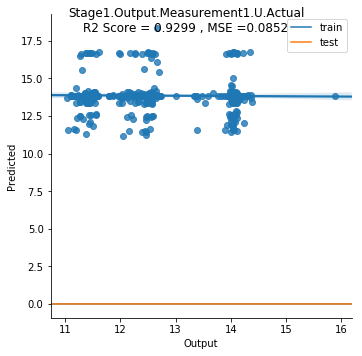

Testing R2 =  0.8074631688726036 Testing MAE =  0.003236063920974045
Training R2 =  0.8259294135445512 Training MAE =  0.002964963390048375
Started
# Number of Records 3586
# of Records =  3586
Train on 2689 samples, validate on 897 samples
Epoch 1/200
 - 2s - loss: 14.8320 - val_loss: 0.2900
Epoch 2/200
 - 1s - loss: 0.1443 - val_loss: 0.0409
Epoch 3/200
 - 1s - loss: 0.0420 - val_loss: 0.0201
Epoch 4/200
 - 1s - loss: 0.0285 - val_loss: 0.0212
Epoch 5/200
 - 1s - loss: 0.0248 - val_loss: 0.0201
Epoch 6/200
 - 1s - loss: 0.0185 - val_loss: 0.0169
Epoch 7/200
 - 1s - loss: 0.0187 - val_loss: 0.0187
Epoch 8/200
 - 1s - loss: 0.0156 - val_loss: 0.0214
Epoch 9/200
 - 1s - loss: 0.0137 - val_loss: 0.0177
Epoch 10/200
 - 1s - loss: 0.0130 - val_loss: 0.0177
Epoch 11/200
 - 1s - loss: 0.0122 - val_loss: 0.0210
Epoch 12/200
 - 1s - loss: 0.0122 - val_loss: 0.0205
Epoch 13/200
 - 1s - loss: 0.0102 - val_loss: 0.0175
Epoch 14/200
 - 1s - loss: 0.0098 - val_loss: 0.0175
Epoch 15/200
 - 1s - loss

 - 1s - loss: 0.0037 - val_loss: 0.0108
Epoch 151/200
 - 1s - loss: 0.0037 - val_loss: 0.0108
Epoch 152/200
 - 1s - loss: 0.0038 - val_loss: 0.0107
Epoch 153/200
 - 1s - loss: 0.0038 - val_loss: 0.0104
Epoch 154/200
 - 1s - loss: 0.0035 - val_loss: 0.0107
Epoch 155/200
 - 1s - loss: 0.0034 - val_loss: 0.0107
Epoch 156/200
 - 1s - loss: 0.0034 - val_loss: 0.0102
Epoch 157/200
 - 1s - loss: 0.0034 - val_loss: 0.0105
Epoch 158/200
 - 1s - loss: 0.0032 - val_loss: 0.0103
Epoch 159/200
 - 1s - loss: 0.0034 - val_loss: 0.0103
Epoch 160/200
 - 1s - loss: 0.0033 - val_loss: 0.0103
Epoch 161/200
 - 1s - loss: 0.0033 - val_loss: 0.0105
Epoch 162/200
 - 1s - loss: 0.0034 - val_loss: 0.0104
Epoch 163/200
 - 1s - loss: 0.0035 - val_loss: 0.0107
Epoch 164/200
 - 1s - loss: 0.0036 - val_loss: 0.0105
Epoch 165/200
 - 1s - loss: 0.0033 - val_loss: 0.0105
Epoch 166/200
 - 1s - loss: 0.0034 - val_loss: 0.0108
Epoch 167/200
 - 1s - loss: 0.0034 - val_loss: 0.0102
Epoch 168/200
 - 1s - loss: 0.0032 - val_l

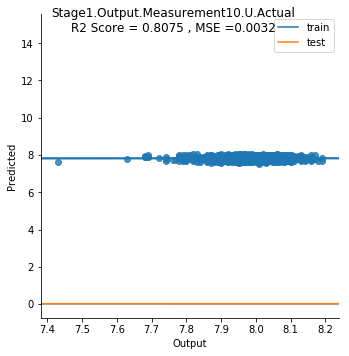

Testing R2 =  0.658158854032511 Testing MAE =  0.00972642334409381
Training R2 =  0.8955844246870505 Training MAE =  0.0021582906141662346
Started
# Number of Records 10858
# of Records =  10857
Train on 8142 samples, validate on 2715 samples
Epoch 1/200
 - 6s - loss: 0.3022 - val_loss: 0.0073
Epoch 2/200
 - 5s - loss: 0.0069 - val_loss: 0.0050
Epoch 3/200
 - 5s - loss: 0.0055 - val_loss: 0.0037
Epoch 4/200
 - 5s - loss: 0.0045 - val_loss: 0.0035
Epoch 5/200
 - 5s - loss: 0.0041 - val_loss: 0.0037
Epoch 6/200
 - 5s - loss: 0.0038 - val_loss: 0.0038
Epoch 7/200
 - 5s - loss: 0.0036 - val_loss: 0.0035
Epoch 8/200
 - 5s - loss: 0.0034 - val_loss: 0.0028
Epoch 9/200
 - 5s - loss: 0.0033 - val_loss: 0.0031
Epoch 10/200
 - 5s - loss: 0.0032 - val_loss: 0.0035
Epoch 11/200
 - 5s - loss: 0.0031 - val_loss: 0.0027
Epoch 12/200
 - 5s - loss: 0.0031 - val_loss: 0.0033
Epoch 13/200
 - 5s - loss: 0.0030 - val_loss: 0.0029
Epoch 14/200
 - 5s - loss: 0.0029 - val_loss: 0.0025
Epoch 15/200
 - 5s - los

 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 151/200
 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 152/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 153/200
 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 154/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 155/200
 - 4s - loss: 0.0017 - val_loss: 0.0018
Epoch 156/200
 - 5s - loss: 0.0017 - val_loss: 0.0018
Epoch 157/200
 - 4s - loss: 0.0017 - val_loss: 0.0018
Epoch 158/200
 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 159/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 160/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 161/200
 - 5s - loss: 0.0017 - val_loss: 0.0018
Epoch 162/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 163/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 164/200
 - 4s - loss: 0.0017 - val_loss: 0.0019
Epoch 165/200
 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 166/200
 - 5s - loss: 0.0017 - val_loss: 0.0018
Epoch 167/200
 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 168/200
 - 5s - loss: 0.0017 - val_l

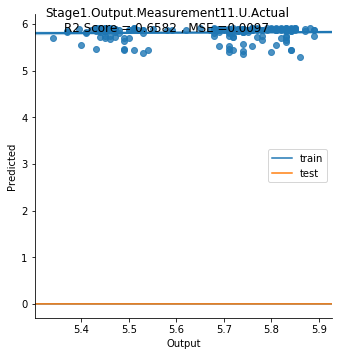

Testing R2 =  0.897820526884539 Testing MAE =  0.0018593279419670153
Training R2 =  0.9049415375797626 Training MAE =  0.0017812573507983037
Started
# Number of Records 12526
# of Records =  12524
Train on 9393 samples, validate on 3131 samples
Epoch 1/200
 - 3s - loss: 1.2353 - val_loss: 0.0598
Epoch 2/200
 - 3s - loss: 0.0529 - val_loss: 0.0356
Epoch 3/200
 - 3s - loss: 0.0402 - val_loss: 0.0381
Epoch 4/200
 - 3s - loss: 0.0377 - val_loss: 0.0305
Epoch 5/200
 - 3s - loss: 0.0363 - val_loss: 0.0333
Epoch 6/200
 - 3s - loss: 0.0345 - val_loss: 0.0343
Epoch 7/200
 - 3s - loss: 0.0338 - val_loss: 0.0330
Epoch 8/200
 - 3s - loss: 0.0328 - val_loss: 0.0299
Epoch 9/200
 - 3s - loss: 0.0316 - val_loss: 0.0333
Epoch 10/200
 - 3s - loss: 0.0317 - val_loss: 0.0348
Epoch 11/200
 - 3s - loss: 0.0316 - val_loss: 0.0312
Epoch 12/200
 - 3s - loss: 0.0312 - val_loss: 0.0331
Epoch 13/200
 - 3s - loss: 0.0309 - val_loss: 0.0314
Epoch 14/200
 - 3s - loss: 0.0307 - val_loss: 0.0321
Epoch 15/200
 - 3s - l

 - 2s - loss: 0.0238 - val_loss: 0.0250
Epoch 151/200
 - 2s - loss: 0.0235 - val_loss: 0.0251
Epoch 152/200
 - 2s - loss: 0.0234 - val_loss: 0.0251
Epoch 153/200
 - 2s - loss: 0.0237 - val_loss: 0.0268
Epoch 154/200
 - 2s - loss: 0.0270 - val_loss: 0.0255
Epoch 155/200
 - 2s - loss: 0.0266 - val_loss: 0.0250
Epoch 156/200
 - 2s - loss: 0.0255 - val_loss: 0.0251
Epoch 157/200
 - 2s - loss: 0.0234 - val_loss: 0.0252
Epoch 158/200
 - 2s - loss: 0.0233 - val_loss: 0.0253
Epoch 159/200
 - 2s - loss: 0.0233 - val_loss: 0.0251
Epoch 160/200
 - 2s - loss: 0.0234 - val_loss: 0.0252
Epoch 161/200
 - 2s - loss: 0.0257 - val_loss: 0.0250
Epoch 162/200
 - 2s - loss: 0.0242 - val_loss: 0.0252
Epoch 163/200
 - 2s - loss: 0.0233 - val_loss: 0.0252
Epoch 164/200
 - 2s - loss: 0.0237 - val_loss: 0.0253
Epoch 165/200
 - 2s - loss: 0.0233 - val_loss: 0.0252
Epoch 166/200
 - 2s - loss: 0.0236 - val_loss: 0.0255
Epoch 167/200
 - 2s - loss: 0.0233 - val_loss: 0.0251
Epoch 168/200
 - 2s - loss: 0.0235 - val_l

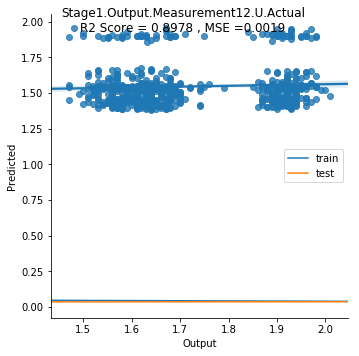

Testing R2 =  0.5233560478163284 Testing MAE =  0.024484047223370043
Training R2 =  0.5628946779241343 Training MAE =  0.022948228730414393
Started
# Number of Records 8964
# of Records =  8932
Train on 6699 samples, validate on 2233 samples
Epoch 1/200
 - 2s - loss: 49.8574 - val_loss: 1.3841
Epoch 2/200
 - 2s - loss: 0.4847 - val_loss: 0.1627
Epoch 3/200
 - 1s - loss: 0.2321 - val_loss: 0.1578
Epoch 4/200
 - 1s - loss: 0.2146 - val_loss: 0.1488
Epoch 5/200
 - 2s - loss: 0.2044 - val_loss: 0.1485
Epoch 6/200
 - 1s - loss: 0.1977 - val_loss: 0.1691
Epoch 7/200
 - 2s - loss: 0.1930 - val_loss: 0.1434
Epoch 8/200
 - 1s - loss: 0.1864 - val_loss: 0.1384
Epoch 9/200
 - 1s - loss: 0.1729 - val_loss: 0.1389
Epoch 10/200
 - 1s - loss: 0.1651 - val_loss: 0.1471
Epoch 11/200
 - 1s - loss: 0.1558 - val_loss: 0.1433
Epoch 12/200
 - 1s - loss: 0.1457 - val_loss: 0.1224
Epoch 13/200
 - 2s - loss: 0.1402 - val_loss: 0.1078
Epoch 14/200
 - 1s - loss: 0.1355 - val_loss: 0.1074
Epoch 15/200
 - 1s - los

 - 1s - loss: 0.0490 - val_loss: 0.0436
Epoch 151/200
 - 1s - loss: 0.0485 - val_loss: 0.0462
Epoch 152/200
 - 1s - loss: 0.0487 - val_loss: 0.0441
Epoch 153/200
 - 1s - loss: 0.0477 - val_loss: 0.0493
Epoch 154/200
 - 1s - loss: 0.0479 - val_loss: 0.0449
Epoch 155/200
 - 1s - loss: 0.0482 - val_loss: 0.0449
Epoch 156/200
 - 2s - loss: 0.0479 - val_loss: 0.0450
Epoch 157/200
 - 2s - loss: 0.0475 - val_loss: 0.0485
Epoch 158/200
 - 1s - loss: 0.0482 - val_loss: 0.0483
Epoch 159/200
 - 1s - loss: 0.0472 - val_loss: 0.0500
Epoch 160/200
 - 1s - loss: 0.0472 - val_loss: 0.0440
Epoch 161/200
 - 2s - loss: 0.0480 - val_loss: 0.0473
Epoch 162/200
 - 2s - loss: 0.0464 - val_loss: 0.0465
Epoch 163/200
 - 1s - loss: 0.0479 - val_loss: 0.0492
Epoch 164/200
 - 1s - loss: 0.0479 - val_loss: 0.0468
Epoch 165/200
 - 1s - loss: 0.0468 - val_loss: 0.0459
Epoch 166/200
 - 2s - loss: 0.0476 - val_loss: 0.0476
Epoch 167/200
 - 2s - loss: 0.0481 - val_loss: 0.0451
Epoch 168/200
 - 2s - loss: 0.0487 - val_l

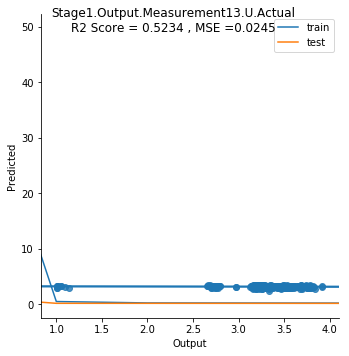

Testing R2 =  0.8420275841383762 Testing MAE =  0.04504244719308959
Training R2 =  0.8456992402375623 Training MAE =  0.044662236769314134
Started
# Number of Records 13899
# of Records =  1848
Train on 1386 samples, validate on 462 samples
Epoch 1/200
 - 1s - loss: 103.2899 - val_loss: 36.0617
Epoch 2/200
 - 0s - loss: 13.6281 - val_loss: 8.5977
Epoch 3/200
 - 0s - loss: 5.7911 - val_loss: 4.6618
Epoch 4/200
 - 0s - loss: 3.2539 - val_loss: 2.6608
Epoch 5/200
 - 0s - loss: 2.0484 - val_loss: 1.6892
Epoch 6/200
 - 0s - loss: 1.4878 - val_loss: 1.2647
Epoch 7/200
 - 0s - loss: 1.2167 - val_loss: 0.9440
Epoch 8/200
 - 0s - loss: 0.9942 - val_loss: 0.7689
Epoch 9/200
 - 0s - loss: 0.8454 - val_loss: 0.6622
Epoch 10/200
 - 0s - loss: 0.8109 - val_loss: 0.6144
Epoch 11/200
 - 0s - loss: 0.6568 - val_loss: 0.5375
Epoch 12/200
 - 0s - loss: 0.6708 - val_loss: 0.4913
Epoch 13/200
 - 0s - loss: 0.6155 - val_loss: 0.4791
Epoch 14/200
 - 0s - loss: 0.5947 - val_loss: 0.4577
Epoch 15/200
 - 0s - l

Epoch 151/200
 - 0s - loss: 0.3600 - val_loss: 0.3715
Epoch 152/200
 - 0s - loss: 0.3553 - val_loss: 0.3695
Epoch 153/200
 - 0s - loss: 0.3632 - val_loss: 0.3699
Epoch 154/200
 - 0s - loss: 0.3598 - val_loss: 0.3705
Epoch 155/200
 - 0s - loss: 0.3632 - val_loss: 0.3717
Epoch 156/200
 - 0s - loss: 0.3623 - val_loss: 0.3714
Epoch 157/200
 - 0s - loss: 0.3621 - val_loss: 0.3695
Epoch 158/200
 - 0s - loss: 0.3653 - val_loss: 0.3695
Epoch 159/200
 - 0s - loss: 0.3625 - val_loss: 0.3703
Epoch 160/200
 - 0s - loss: 0.3607 - val_loss: 0.3701
Epoch 161/200
 - 0s - loss: 0.3644 - val_loss: 0.3712
Epoch 162/200
 - 0s - loss: 0.3660 - val_loss: 0.3725
Epoch 163/200
 - 0s - loss: 0.3624 - val_loss: 0.3701
Epoch 164/200
 - 0s - loss: 0.3616 - val_loss: 0.3721
Epoch 165/200
 - 0s - loss: 0.3646 - val_loss: 0.3711
Epoch 166/200
 - 0s - loss: 0.3670 - val_loss: 0.3700
Epoch 167/200
 - 0s - loss: 0.3638 - val_loss: 0.3705
Epoch 168/200
 - 0s - loss: 0.3646 - val_loss: 0.3695
Epoch 169/200
 - 0s - loss: 

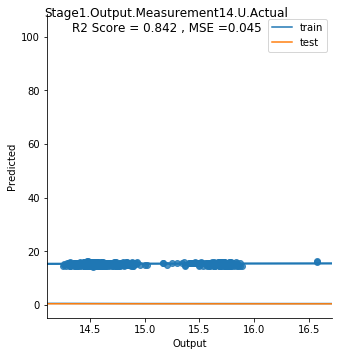

Testing R2 =  0.2516470709307925 Testing MAE =  0.36831327368803746
Training R2 =  0.26296448959888097 Training MAE =  0.3463184873202592
Started
# Number of Records 13789
# of Records =  13782
Train on 10336 samples, validate on 3446 samples
Epoch 1/200
 - 3s - loss: 51.1557 - val_loss: 0.0159
Epoch 2/200
 - 2s - loss: 0.0653 - val_loss: 0.0121
Epoch 3/200
 - 2s - loss: 0.0437 - val_loss: 0.0096
Epoch 4/200
 - 2s - loss: 0.0317 - val_loss: 0.0228
Epoch 5/200
 - 2s - loss: 0.0242 - val_loss: 0.0094
Epoch 6/200
 - 2s - loss: 0.0199 - val_loss: 0.0120
Epoch 7/200
 - 2s - loss: 0.0174 - val_loss: 0.0118
Epoch 8/200
 - 2s - loss: 0.0171 - val_loss: 0.0082
Epoch 9/200
 - 2s - loss: 0.0149 - val_loss: 0.0091
Epoch 10/200
 - 2s - loss: 0.0157 - val_loss: 0.0082
Epoch 11/200
 - 2s - loss: 0.0136 - val_loss: 0.0097
Epoch 12/200
 - 2s - loss: 0.0137 - val_loss: 0.0168
Epoch 13/200
 - 2s - loss: 0.0142 - val_loss: 0.0112
Epoch 14/200
 - 2s - loss: 0.0127 - val_loss: 0.0109
Epoch 15/200
 - 2s - lo

 - 2s - loss: 0.0057 - val_loss: 0.0083
Epoch 151/200
 - 2s - loss: 0.0059 - val_loss: 0.0084
Epoch 152/200
 - 2s - loss: 0.0061 - val_loss: 0.0092
Epoch 153/200
 - 2s - loss: 0.0058 - val_loss: 0.0092
Epoch 154/200
 - 2s - loss: 0.0058 - val_loss: 0.0079
Epoch 155/200
 - 2s - loss: 0.0058 - val_loss: 0.0087
Epoch 156/200
 - 2s - loss: 0.0058 - val_loss: 0.0095
Epoch 157/200
 - 2s - loss: 0.0060 - val_loss: 0.0080
Epoch 158/200
 - 2s - loss: 0.0056 - val_loss: 0.0074
Epoch 159/200
 - 2s - loss: 0.0058 - val_loss: 0.0090
Epoch 160/200
 - 2s - loss: 0.0060 - val_loss: 0.0100
Epoch 161/200
 - 2s - loss: 0.0056 - val_loss: 0.0093
Epoch 162/200
 - 2s - loss: 0.0059 - val_loss: 0.0105
Epoch 163/200
 - 2s - loss: 0.0057 - val_loss: 0.0100
Epoch 164/200
 - 2s - loss: 0.0059 - val_loss: 0.0081
Epoch 165/200
 - 2s - loss: 0.0059 - val_loss: 0.0083
Epoch 166/200
 - 2s - loss: 0.0057 - val_loss: 0.0084
Epoch 167/200
 - 2s - loss: 0.0056 - val_loss: 0.0091
Epoch 168/200
 - 2s - loss: 0.0057 - val_l

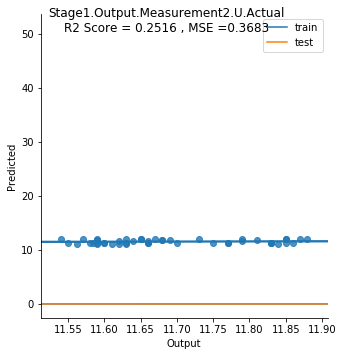

Testing R2 =  0.35296529583971725 Testing MAE =  0.0071957898018158595
Training R2 =  0.45100166569488986 Training MAE =  0.005908154510356936
Started
# Number of Records 13879
# of Records =  13878
Train on 10408 samples, validate on 3470 samples
Epoch 1/200
 - 4s - loss: 107.9899 - val_loss: 0.4600
Epoch 2/200
 - 4s - loss: 0.5905 - val_loss: 0.3781
Epoch 3/200
 - 4s - loss: 0.5223 - val_loss: 0.4723
Epoch 4/200
 - 4s - loss: 0.4948 - val_loss: 0.3760
Epoch 5/200
 - 4s - loss: 0.4923 - val_loss: 0.3701
Epoch 6/200
 - 4s - loss: 0.4695 - val_loss: 0.3577
Epoch 7/200
 - 4s - loss: 0.4566 - val_loss: 0.3449
Epoch 8/200
 - 4s - loss: 0.4400 - val_loss: 0.4394
Epoch 9/200
 - 4s - loss: 0.4435 - val_loss: 0.3523
Epoch 10/200
 - 4s - loss: 0.4417 - val_loss: 0.3499
Epoch 11/200
 - 4s - loss: 0.4232 - val_loss: 0.3375
Epoch 12/200
 - 4s - loss: 0.4115 - val_loss: 0.3674
Epoch 13/200
 - 4s - loss: 0.3994 - val_loss: 0.3165
Epoch 14/200
 - 4s - loss: 0.3852 - val_loss: 0.3228
Epoch 15/200
 - 4

 - 4s - loss: 0.0737 - val_loss: 0.0750
Epoch 151/200
 - 4s - loss: 0.0727 - val_loss: 0.0689
Epoch 152/200
 - 4s - loss: 0.0762 - val_loss: 0.0712
Epoch 153/200
 - 4s - loss: 0.0762 - val_loss: 0.1461
Epoch 154/200
 - 4s - loss: 0.0722 - val_loss: 0.0830
Epoch 155/200
 - 4s - loss: 0.0792 - val_loss: 0.0894
Epoch 156/200
 - 4s - loss: 0.0683 - val_loss: 0.0726
Epoch 157/200
 - 4s - loss: 0.0731 - val_loss: 0.0689
Epoch 158/200
 - 4s - loss: 0.0655 - val_loss: 0.0650
Epoch 159/200
 - 4s - loss: 0.0669 - val_loss: 0.0819
Epoch 160/200
 - 4s - loss: 0.0747 - val_loss: 0.0667
Epoch 161/200
 - 5s - loss: 0.0666 - val_loss: 0.0743
Epoch 162/200
 - 4s - loss: 0.0679 - val_loss: 0.0944
Epoch 163/200
 - 4s - loss: 0.0675 - val_loss: 0.1394
Epoch 164/200
 - 4s - loss: 0.0661 - val_loss: 0.0858
Epoch 165/200
 - 4s - loss: 0.0742 - val_loss: 0.0606
Epoch 166/200
 - 4s - loss: 0.0677 - val_loss: 0.0837
Epoch 167/200
 - 4s - loss: 0.0705 - val_loss: 0.0783
Epoch 168/200
 - 4s - loss: 0.0701 - val_l

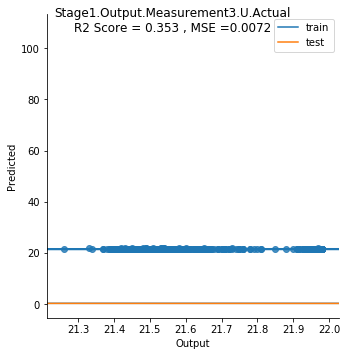

Testing R2 =  0.9317431608560043 Testing MAE =  0.07294306917463599
Training R2 =  0.948696597980954 Training MAE =  0.0565541757223397
Started
# Number of Records 635
# of Records =  634
Train on 475 samples, validate on 159 samples
Epoch 1/200
 - 1s - loss: 6.8654 - val_loss: 6.0606
Epoch 2/200
 - 0s - loss: 3.8811 - val_loss: 1.2783
Epoch 3/200
 - 0s - loss: 0.8974 - val_loss: 0.6741
Epoch 4/200
 - 0s - loss: 0.4922 - val_loss: 0.3653
Epoch 5/200
 - 0s - loss: 0.2797 - val_loss: 0.2133
Epoch 6/200
 - 0s - loss: 0.1736 - val_loss: 0.1320
Epoch 7/200
 - 0s - loss: 0.1041 - val_loss: 0.0832
Epoch 8/200
 - 0s - loss: 0.0593 - val_loss: 0.0441
Epoch 9/200
 - 0s - loss: 0.0377 - val_loss: 0.0360
Epoch 10/200
 - 0s - loss: 0.0352 - val_loss: 0.0395
Epoch 11/200
 - 0s - loss: 0.0280 - val_loss: 0.0372
Epoch 12/200
 - 0s - loss: 0.0263 - val_loss: 0.0288
Epoch 13/200
 - 0s - loss: 0.0230 - val_loss: 0.0272
Epoch 14/200
 - 0s - loss: 0.0237 - val_loss: 0.0297
Epoch 15/200
 - 0s - loss: 0.0224

Epoch 151/200
 - 0s - loss: 0.0099 - val_loss: 0.0227
Epoch 152/200
 - 0s - loss: 0.0097 - val_loss: 0.0226
Epoch 153/200
 - 0s - loss: 0.0097 - val_loss: 0.0229
Epoch 154/200
 - 0s - loss: 0.0096 - val_loss: 0.0228
Epoch 155/200
 - 0s - loss: 0.0096 - val_loss: 0.0226
Epoch 156/200
 - 0s - loss: 0.0099 - val_loss: 0.0238
Epoch 157/200
 - 0s - loss: 0.0099 - val_loss: 0.0227
Epoch 158/200
 - 0s - loss: 0.0096 - val_loss: 0.0235
Epoch 159/200
 - 0s - loss: 0.0094 - val_loss: 0.0225
Epoch 160/200
 - 0s - loss: 0.0097 - val_loss: 0.0226
Epoch 161/200
 - 0s - loss: 0.0098 - val_loss: 0.0228
Epoch 162/200
 - 0s - loss: 0.0098 - val_loss: 0.0232
Epoch 163/200
 - 0s - loss: 0.0095 - val_loss: 0.0229
Epoch 164/200
 - 0s - loss: 0.0097 - val_loss: 0.0227
Epoch 165/200
 - 0s - loss: 0.0097 - val_loss: 0.0226
Epoch 166/200
 - 0s - loss: 0.0094 - val_loss: 0.0229
Epoch 167/200
 - 0s - loss: 0.0097 - val_loss: 0.0229
Epoch 168/200
 - 0s - loss: 0.0098 - val_loss: 0.0227
Epoch 169/200
 - 0s - loss: 

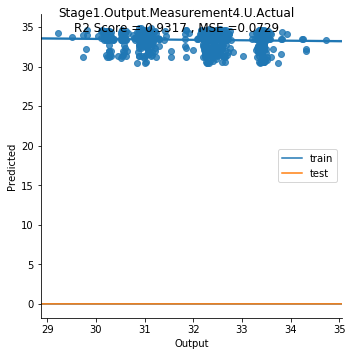

Testing R2 =  0.3517826962431696 Testing MAE =  0.022599882194526973
Training R2 =  0.5678797414491703 Training MAE =  0.009027781619213119
Started
# Number of Records 9238
# of Records =  9238
Train on 6928 samples, validate on 2310 samples
Epoch 1/200
 - 3s - loss: 0.7103 - val_loss: 0.2487
Epoch 2/200
 - 2s - loss: 0.2302 - val_loss: 0.2356
Epoch 3/200
 - 2s - loss: 0.2238 - val_loss: 0.2291
Epoch 4/200
 - 2s - loss: 0.2194 - val_loss: 0.2253
Epoch 5/200
 - 2s - loss: 0.2155 - val_loss: 0.2196
Epoch 6/200
 - 2s - loss: 0.2099 - val_loss: 0.2222
Epoch 7/200
 - 2s - loss: 0.2068 - val_loss: 0.2125
Epoch 8/200
 - 2s - loss: 0.1977 - val_loss: 0.2188
Epoch 9/200
 - 2s - loss: 0.1968 - val_loss: 0.2120
Epoch 10/200
 - 2s - loss: 0.1882 - val_loss: 0.2065
Epoch 11/200
 - 2s - loss: 0.1864 - val_loss: 0.1892
Epoch 12/200
 - 2s - loss: 0.1809 - val_loss: 0.1925
Epoch 13/200
 - 2s - loss: 0.1802 - val_loss: 0.1853
Epoch 14/200
 - 2s - loss: 0.1751 - val_loss: 0.1826
Epoch 15/200
 - 2s - loss

 - 2s - loss: 0.0703 - val_loss: 0.1155
Epoch 151/200
 - 2s - loss: 0.0720 - val_loss: 0.0891
Epoch 152/200
 - 2s - loss: 0.0701 - val_loss: 0.0865
Epoch 153/200
 - 2s - loss: 0.0697 - val_loss: 0.0879
Epoch 154/200
 - 2s - loss: 0.0709 - val_loss: 0.0940
Epoch 155/200
 - 2s - loss: 0.0707 - val_loss: 0.1033
Epoch 156/200
 - 2s - loss: 0.0712 - val_loss: 0.1072
Epoch 157/200
 - 2s - loss: 0.0695 - val_loss: 0.0937
Epoch 158/200
 - 2s - loss: 0.0753 - val_loss: 0.0910
Epoch 159/200
 - 2s - loss: 0.0697 - val_loss: 0.0959
Epoch 160/200
 - 2s - loss: 0.0714 - val_loss: 0.0904
Epoch 161/200
 - 2s - loss: 0.0718 - val_loss: 0.0999
Epoch 162/200
 - 2s - loss: 0.0729 - val_loss: 0.0911
Epoch 163/200
 - 2s - loss: 0.0693 - val_loss: 0.1114
Epoch 164/200
 - 2s - loss: 0.0745 - val_loss: 0.1021
Epoch 165/200
 - 2s - loss: 0.0713 - val_loss: 0.0945
Epoch 166/200
 - 2s - loss: 0.0686 - val_loss: 0.0871
Epoch 167/200
 - 2s - loss: 0.0719 - val_loss: 0.0911
Epoch 168/200
 - 2s - loss: 0.0692 - val_l

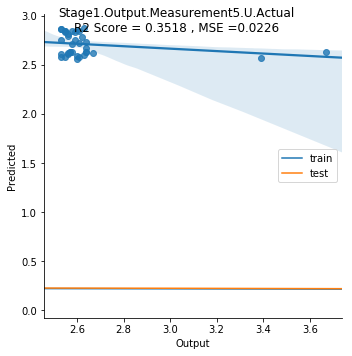

Testing R2 =  0.7949583708141869 Testing MAE =  0.0885573594160917
Training R2 =  0.8194405450752963 Training MAE =  0.0730420747557138
Started
# Number of Records 5280
# of Records =  4313
Train on 3234 samples, validate on 1079 samples
Epoch 1/200
 - 1s - loss: 2.2379 - val_loss: 0.2245
Epoch 2/200
 - 1s - loss: 0.1037 - val_loss: 0.0353
Epoch 3/200
 - 1s - loss: 0.0181 - val_loss: 0.0035
Epoch 4/200
 - 1s - loss: 0.0095 - val_loss: 0.0022
Epoch 5/200
 - 1s - loss: 0.0079 - val_loss: 0.0017
Epoch 6/200
 - 1s - loss: 0.0070 - val_loss: 0.0082
Epoch 7/200
 - 1s - loss: 0.0065 - val_loss: 0.0016
Epoch 8/200
 - 1s - loss: 0.0052 - val_loss: 0.0020
Epoch 9/200
 - 1s - loss: 0.0045 - val_loss: 8.7934e-04
Epoch 10/200
 - 1s - loss: 0.0043 - val_loss: 9.5096e-04
Epoch 11/200
 - 1s - loss: 0.0040 - val_loss: 0.0055
Epoch 12/200
 - 1s - loss: 0.0041 - val_loss: 6.9278e-04
Epoch 13/200
 - 1s - loss: 0.0030 - val_loss: 0.0046
Epoch 14/200
 - 1s - loss: 0.0033 - val_loss: 0.0010
Epoch 15/200
 - 1

Epoch 135/200
 - 1s - loss: 6.6554e-04 - val_loss: 6.5105e-04
Epoch 136/200
 - 1s - loss: 6.6212e-04 - val_loss: 6.9260e-04
Epoch 137/200
 - 1s - loss: 6.6649e-04 - val_loss: 8.3913e-04
Epoch 138/200
 - 1s - loss: 6.6722e-04 - val_loss: 7.7198e-04
Epoch 139/200
 - 1s - loss: 6.6942e-04 - val_loss: 8.0305e-04
Epoch 140/200
 - 1s - loss: 6.6124e-04 - val_loss: 7.0193e-04
Epoch 141/200
 - 1s - loss: 6.7470e-04 - val_loss: 8.3125e-04
Epoch 142/200
 - 1s - loss: 6.7076e-04 - val_loss: 6.8516e-04
Epoch 143/200
 - 1s - loss: 6.5824e-04 - val_loss: 7.7684e-04
Epoch 144/200
 - 1s - loss: 6.5650e-04 - val_loss: 8.0862e-04
Epoch 145/200
 - 1s - loss: 6.5595e-04 - val_loss: 7.9547e-04
Epoch 146/200
 - 1s - loss: 6.5371e-04 - val_loss: 7.7902e-04
Epoch 147/200
 - 1s - loss: 6.6579e-04 - val_loss: 6.6000e-04
Epoch 148/200
 - 1s - loss: 6.6572e-04 - val_loss: 7.5304e-04
Epoch 149/200
 - 1s - loss: 6.5232e-04 - val_loss: 7.6834e-04
Epoch 150/200
 - 1s - loss: 6.6952e-04 - val_loss: 8.5725e-04
Epoch 15

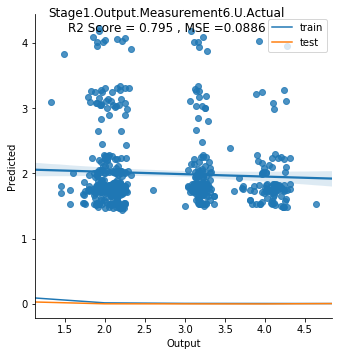

Testing R2 =  -0.13018475588051848 Testing MAE =  0.0008181385791856203
Training R2 =  -0.06865944604829699 Training MAE =  0.0007612326339075587
Started
# Number of Records 13175
# of Records =  12235
Train on 9176 samples, validate on 3059 samples
Epoch 1/200
 - 2s - loss: 93.6385 - val_loss: 0.6220
Epoch 2/200
 - 1s - loss: 0.8048 - val_loss: 0.0499
Epoch 3/200
 - 1s - loss: 0.5296 - val_loss: 0.1008
Epoch 4/200
 - 1s - loss: 0.4271 - val_loss: 0.0545
Epoch 5/200
 - 1s - loss: 0.3445 - val_loss: 0.0206
Epoch 6/200
 - 1s - loss: 0.2919 - val_loss: 0.0119
Epoch 7/200
 - 1s - loss: 0.2403 - val_loss: 0.0083
Epoch 8/200
 - 1s - loss: 0.2118 - val_loss: 0.0070
Epoch 9/200
 - 1s - loss: 0.1607 - val_loss: 0.0126
Epoch 10/200
 - 1s - loss: 0.1282 - val_loss: 0.0062
Epoch 11/200
 - 1s - loss: 0.0973 - val_loss: 0.0067
Epoch 12/200
 - 1s - loss: 0.0742 - val_loss: 0.0071
Epoch 13/200
 - 1s - loss: 0.0525 - val_loss: 0.0173
Epoch 14/200
 - 1s - loss: 0.0357 - val_loss: 0.0049
Epoch 15/200
 - 

 - 1s - loss: 0.0042 - val_loss: 0.0027
Epoch 151/200
 - 1s - loss: 0.0042 - val_loss: 0.0033
Epoch 152/200
 - 1s - loss: 0.0043 - val_loss: 0.0033
Epoch 153/200
 - 1s - loss: 0.0042 - val_loss: 0.0031
Epoch 154/200
 - 1s - loss: 0.0042 - val_loss: 0.0031
Epoch 155/200
 - 1s - loss: 0.0042 - val_loss: 0.0033
Epoch 156/200
 - 1s - loss: 0.0042 - val_loss: 0.0028
Epoch 157/200
 - 1s - loss: 0.0041 - val_loss: 0.0029
Epoch 158/200
 - 1s - loss: 0.0041 - val_loss: 0.0028
Epoch 159/200
 - 1s - loss: 0.0042 - val_loss: 0.0031
Epoch 160/200
 - 1s - loss: 0.0042 - val_loss: 0.0031
Epoch 161/200
 - 1s - loss: 0.0041 - val_loss: 0.0030
Epoch 162/200
 - 1s - loss: 0.0042 - val_loss: 0.0030
Epoch 163/200
 - 1s - loss: 0.0042 - val_loss: 0.0030
Epoch 164/200
 - 1s - loss: 0.0041 - val_loss: 0.0032
Epoch 165/200
 - 1s - loss: 0.0042 - val_loss: 0.0033
Epoch 166/200
 - 1s - loss: 0.0042 - val_loss: 0.0029
Epoch 167/200
 - 1s - loss: 0.0042 - val_loss: 0.0030
Epoch 168/200
 - 1s - loss: 0.0041 - val_l

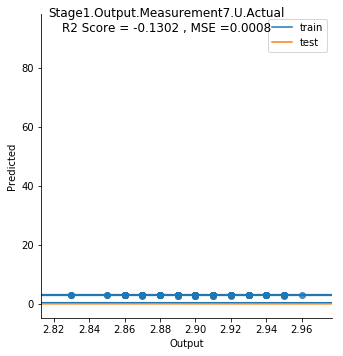

Testing R2 =  0.4864427635943597 Testing MAE =  0.0029510808461489387
Training R2 =  0.4541677668213453 Training MAE =  0.003272170346072523
Started
# Number of Records 13221
# of Records =  13216
Train on 9912 samples, validate on 3304 samples
Epoch 1/200
 - 2s - loss: 67.3202 - val_loss: 0.4730
Epoch 2/200
 - 2s - loss: 0.4610 - val_loss: 0.1113
Epoch 3/200
 - 2s - loss: 0.3426 - val_loss: 0.0846
Epoch 4/200
 - 2s - loss: 0.2921 - val_loss: 0.1102
Epoch 5/200
 - 2s - loss: 0.2489 - val_loss: 0.0563
Epoch 6/200
 - 2s - loss: 0.2087 - val_loss: 0.0490
Epoch 7/200
 - 2s - loss: 0.1772 - val_loss: 0.0660
Epoch 8/200
 - 2s - loss: 0.1553 - val_loss: 0.0593
Epoch 9/200
 - 2s - loss: 0.1303 - val_loss: 0.0505
Epoch 10/200
 - 2s - loss: 0.1081 - val_loss: 0.0338
Epoch 11/200
 - 2s - loss: 0.0979 - val_loss: 0.0386
Epoch 12/200
 - 2s - loss: 0.0860 - val_loss: 0.0485
Epoch 13/200
 - 2s - loss: 0.0779 - val_loss: 0.0306
Epoch 14/200
 - 2s - loss: 0.0654 - val_loss: 0.0309
Epoch 15/200
 - 2s - 

 - 2s - loss: 0.0229 - val_loss: 0.0230
Epoch 151/200
 - 2s - loss: 0.0224 - val_loss: 0.0249
Epoch 152/200
 - 2s - loss: 0.0225 - val_loss: 0.0234
Epoch 153/200
 - 2s - loss: 0.0224 - val_loss: 0.0247
Epoch 154/200
 - 2s - loss: 0.0229 - val_loss: 0.0241
Epoch 155/200
 - 2s - loss: 0.0224 - val_loss: 0.0223
Epoch 156/200
 - 2s - loss: 0.0223 - val_loss: 0.0208
Epoch 157/200
 - 2s - loss: 0.0227 - val_loss: 0.0242
Epoch 158/200
 - 2s - loss: 0.0221 - val_loss: 0.0239
Epoch 159/200
 - 2s - loss: 0.0227 - val_loss: 0.0233
Epoch 160/200
 - 2s - loss: 0.0223 - val_loss: 0.0240
Epoch 161/200
 - 2s - loss: 0.0222 - val_loss: 0.0231
Epoch 162/200
 - 2s - loss: 0.0225 - val_loss: 0.0250
Epoch 163/200
 - 2s - loss: 0.0220 - val_loss: 0.0237
Epoch 164/200
 - 2s - loss: 0.0217 - val_loss: 0.0242
Epoch 165/200
 - 2s - loss: 0.0227 - val_loss: 0.0240
Epoch 166/200
 - 2s - loss: 0.0226 - val_loss: 0.0229
Epoch 167/200
 - 2s - loss: 0.0218 - val_loss: 0.0220
Epoch 168/200
 - 2s - loss: 0.0217 - val_l

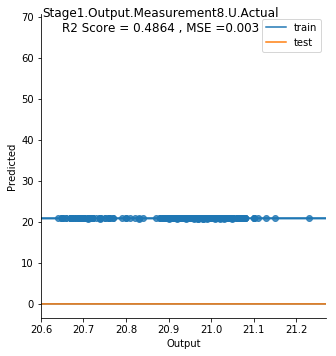

Testing R2 =  0.7339862771274897 Testing MAE =  0.0205817005709771
Training R2 =  0.7327331874370604 Training MAE =  0.019367668312407094
--- 6707.061914920807 seconds ---


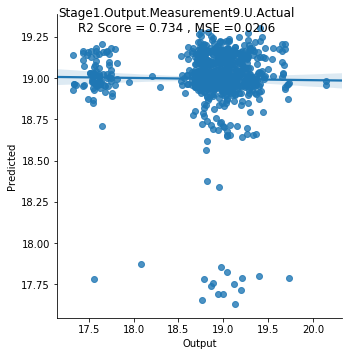

In [77]:
import matplotlib.pyplot as plt
import time
start_time = time.time()
%matplotlib inline
for col in output_col:
    considered_col = input_col.copy()
    considered_col.append(col)
    filt_df = df[considered_col]
    overall_col = input_col.copy()
    overall_col.append(col)
    filt_df = df[overall_col]
    
    filt_df = filt_df.loc[filt_df[col]>0].copy() # many records with 0 as output value are removed
    spec_limit = filt_df.groupby(['Setting']).agg({col:{'Mean':'mean', 'Std':'std'}})
    spec_limit.columns = spec_limit.columns.droplevel(0) 
    spec_limit = spec_limit.reset_index()
    
    new_df = pd.merge(filt_df, spec_limit, on = ['Setting'], how = 'inner')
    new_df  = new_df.loc[(new_df[col] > new_df['Mean'] - 3* new_df['Std'])
                             & (new_df[col] < new_df['Mean'] + 3* new_df['Std'])].copy()
    

    new_df = new_df.loc[new_df[col]>1].copy() 
    new_df = new_df.drop(['Mean', 'Std', 'time_stamp'], axis=1)
    
    print ("Started")
    
    
    # Filter Input Factors based on corr value with output
    corr_matrix = new_df.corr().abs()
    corr_matrix = corr_matrix.loc[corr_matrix.index == col].copy()
    filt_col = [c for c in corr_matrix.columns if any(corr_matrix[c] > 0.3)] # Filter columns with higher correlation
    
    
    # Split the dataset into training and testinng stratified based on setting parameter
    stratified_col = filt_col.copy()
    stratified_col.append('Setting')
    new_df = new_df[stratified_col]
    new_df = new_df.dropna()
    
    filt_df = new_df.copy()
    
    if (isinstance(filt_df, pd.DataFrame)):
        
        if(len(filt_df)>1):
            
            print ("# Number of Records", len(new_df))
            
            new_df = new_df.drop_duplicates() 
            
            y = new_df['Setting']
            
            print ("# of Records = ", len(new_df))
            
            train_x, test_x= train_test_split(new_df,test_size = 0.25, stratify = y)

            
            train_x = train_x.dropna()
            test_x = test_x.dropna()
            train_y = train_x[col]
            test_y = test_x[col]
            
            
            train_x = train_x.drop(['Setting', col], axis = 1)
            test_x = test_x.drop(['Setting', col], axis = 1)
            train_x = train_x.reset_index()
            test_x = test_x.reset_index()
            
            # Apply normalization techniques to perform standardization
            sc = StandardScaler()
            train_x_trans = sc.fit_transform(train_x)
            test_x_trans = sc.transform(test_x)
            
            #train_x_trans = train_x.copy()
            #test_x_trans = test_x.copy()
            
            # Reshaping it for LSTM
            train_x_trans = train_x_trans.reshape(train_x_trans.shape[0],train_x_trans.shape[1], 1)
            test_x_trans = test_x_trans.reshape(test_x_trans.shape[0],test_x_trans.shape[1],1)
            
            #n_steps = 
            
            model = Sequential()
            model.add(LSTM(50, activation = 'relu', return_sequences =True, input_shape = (train_x_trans.shape[1], 
                                                                                             train_x_trans.shape[2])))
            model.add(Dropout(0.1))
            model.add(LSTM(25, activation = 'relu'))
            
            model.add(Dense(1))
            model.compile(loss='mse', optimizer= 'adam')
            
            history = model.fit(train_x_trans, train_y, epochs = 200,
                               validation_data =(test_x_trans, test_y),verbose = 2, shuffle = False )
            
            plt.plot(history.history['loss'], label='train')
            plt.plot(history.history['val_loss'], label='test')
            plt.legend()
            plt.show()
            
            test_y_predict = list(itertools.chain.from_iterable(model.predict(test_x_trans)))
            train_y_predict = list(itertools.chain.from_iterable(model.predict(train_x_trans)))
            
            # Accuracy Metrics
            r2_val_test = r2_score(test_y, test_y_predict)
            mae_val_test = mean_squared_error(test_y, test_y_predict)
            
            print ("Testing R2 = ", r2_val_test, "Testing MAE = ", mae_val_test)
            
            # Training Metrics 
            r2_val_train = r2_score(train_y, train_y_predict)
            mae_val_train = mean_squared_error(train_y, train_y_predict)
            print ("Training R2 = ", r2_val_train, "Training MAE = ", mae_val_train)
            
            
            selected_features = selected_features.append({'CHARACTERISTIC_NAME': col, 'INPUT_FEATURES': list(train_x.columns)}, ignore_index = True)
            cross_val_scores = cross_val_scores.append({'CHARACTERISTIC_NAME': col, 'R2_score_Train': r2_val_train,
                                                        'MAE_Train': mae_val_train, 'R2_score_Test': r2_val_test,
                                                        'MAE_Test': mae_val_test
                                                       }, ignore_index=True)
            
            model_directory ="../Model"
            
            if not os.path.exists(model_directory):
                os.makedirs(model_directory)
            
            model_file = model_directory+ col+ ".yaml"
            weights_file = model_directory+col+ ".h5"
            norm_file = model_directory+ col+ "norm"+ ".joblib"
            
            dump(sc,norm_file)
            
            model_yaml = model.to_yaml()
            with open(model_file, "w") as yaml_file:
                yaml_file.write(model_yaml)
            
            model.save_weights(weights_file)
            
            train_x['Predicted'] = model.predict(train_x_trans)
            test_x['Predicted'] = model.predict(test_x_trans)
            train_x['Output'] = train_y#tpot.predict(X_test)
            test_x['Output'] = test_y#tpot.predict(X_test)

            
            limit_col = col.replace('Actual', 'Setpoint')
            max_limit = df[limit_col].max()
            
            train_x['Set_Point'] = max_limit
            train_x['Actual_Warning'] = 0
            train_x['Predicted_Warning'] = 0
            train_x.loc[train_x['Output']>max_limit, 'Actual_Warning'] = 1
            train_x.loc[train_x['Predicted']>max_limit, 'Predicted_Warning'] = 1
            
            test_x['Set_Point'] = max_limit
            test_x['Actual_Warning'] = 0
            test_x['Predicted_Warning'] = 0
            test_x.loc[test_x['Output']>max_limit, 'Actual_Warning'] = 1
            test_x.loc[test_x['Predicted']>max_limit, 'Predicted_Warning'] = 1
            
            training_file = col + ".csv"
            testing_file =  col + ".csv"

            train_x.to_csv(training_file)
            test_x.to_csv(testing_file)
              
            sns_plot = sns.lmplot(x='Output', y="Predicted", data=test_x)# hue = "MACHINE_NUMBER")
            fig = sns_plot.fig
            plt.suptitle(col +"\n" + "R2 Score = "+ str(round(r2_val_test,4)) + " , MSE =" +str(round(mae_val_test,4)), fontsize  = 12)
            line_plot.savefig(fig,bbox_inches = 'tight',dpi = 300)
            
            
            
            
    
line_plot.close()
selected_features.to_csv("Inputfeatures_selected.csv")
cross_val_scores.to_csv("Cross_Val_Score_Testing.csv")
print("--- %s seconds ---" % (time.time() - start_time))